In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [2]:
data=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hu_12_formations_points.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'u_dn_ppm', 'u_fl_ppm', 'ag_ppm',
       'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm',
       ...
       'Washakie Formation', 'Water', 'Wayan and Smiths Formations',
       'Wells and Amsden Formations (TB), or Casper Formation and Madison Limestone (N, S)',
       'White River Formation',
       'Wilkins Peak Member and Tipton Shale Member or Tongue of Green River Formation',
       'Wilkins Peak Member of Green River Formation', 'Willwood Formation',
       'Wind River Formation - at base locally includes equivalent of Indian Meadows Formation',
       'Wind River and Indian Meadows Formations'],
      dtype='object', length=290)

In [4]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
clf.fit(X, y).predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X = data.iloc[0:, 2:55].values

In [6]:
from sklearn.preprocessing import Binarizer
y = data.iloc[0:,82:].values
ybinarized = Binarizer().fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, ybinarized, test_size=0.1, random_state=52)

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier

In [56]:
#clf=KNeighborsClassifier(n_neighbors=i, weights='uniform')
#clf=ExtraTreesClassifier(n_estimators=i, max_features=30)

scores=[]
for i in range(1,20,5):
    clf=ExtraTreesClassifier(n_estimators=i, max_features=30)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores.append(accuracy_score(y_test.astype(int), preds, normalize=True))
    

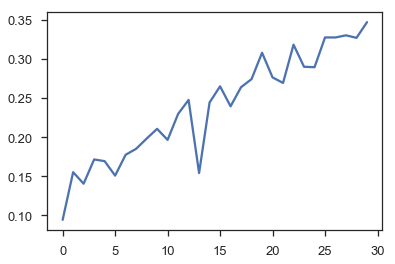

In [62]:
plt.plot(scores[0:30])

In [20]:
preds=models.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype(int), preds, normalize=True)

0.017362995116657624

In [146]:
from sklearn.model_selection import GridSearchCV

In [157]:
etc=ExtraTreesClassifier()
parameters={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50], 'max_features':[1,5,10,15,20,25,30,35,45,50]}

In [158]:
clf=GridSearchCV(etc, parameters)

In [159]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': [1, 5, 10, 15, 20, 25, 30, 35, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
tuned=clf.fit(X_train, y_train.astype(int))

In [161]:
tuned_predictions=tuned.predict(X_test)

In [164]:
accuracy_score(y_test.astype(int), tuned_predictions, normalized=False)

1038

In [172]:
tuned.results()

AttributeError: 'GridSearchCV' object has no attribute 'results'

In [409]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D


In [456]:
nn=Sequential()
nn.add(Dense(10, activation='relu', input_shape=(53,)))
nn.add(Dropout(0.9))
nn.add(Dense(208, activation='sigmoid'))
nn.add(Dropout(0.8))
nn.add(Dense(208, activation='softmax'))
nn.add(Dropout(0.7))
nn.add(Dense(208, activation='relu'))
nn.add(Dropout(0.6))


In [457]:
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [458]:
history=nn.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, validation_data=(X_test, y_test), shuffle=True,
              verbose=0)

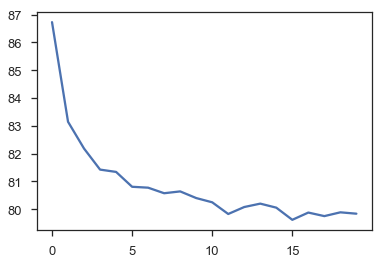

In [459]:
plt.plot(history.history['loss'])

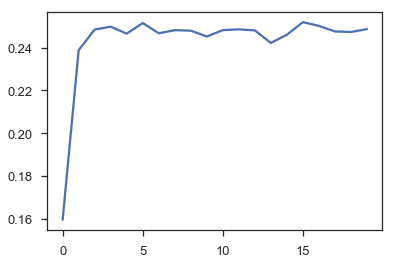

In [460]:
plt.plot(history.history['categorical_accuracy'])

In [417]:
neural=nn.predict(X_test)

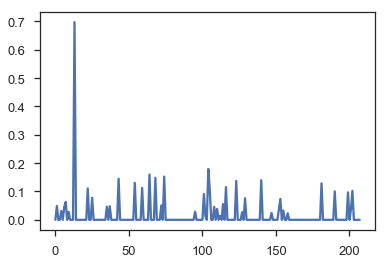

In [406]:
nbin = Binarizer(threshold=0.1).fit_transform(neural)
plt.plot(neural[1000])

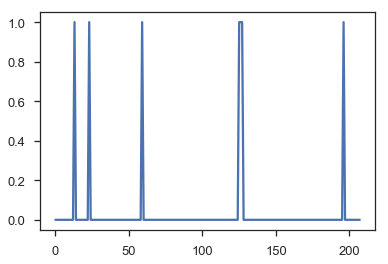

In [407]:
plt.plot(y_test[1000])

In [338]:
data.iloc[0,np.array(np.where(nbin[2]==1)).flatten()+82]

Absaroka Volcanic Supergroup: Hominy Peak Formation                                                                                                                                                                                                               0
Absaroka Volcanic Supergroup: Sunlight Group - Trout Peak Trachyandesite                                                                                                                                                                                          0
Absaroka Volcanic Supergroup: Sunlight Group - Trout Peak Trachyandesite, Wapiti Formation, Crescent Hill Basalt, and Mount Wallace Formation                                                                                                                     0
Absaroka Volcanic Supergroup: Sunlight Group - Wapiti Formation                                                                                                                                                             

In [357]:
y_train.shape

(16578, 208)